# Import Library

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# path file dataset
file_path = 'Dataset/validated.tsv'

# membaca dataset
df = pd.read_csv(file_path, sep='\t')

# menampilkan dataset
df.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,00f046cd1abd7e4ed354c2d97b67aceee8deb20bf53e5c...,common_voice_id_39599471.mp3,05e82b3c6f238b34985f158c4b63a8a9fda0382f1bd798...,Dia tidak sepenuhnya mempercayaiku.,NaN,2,0,NaN,NaN,NaN,NaN,id,NaN
1,018b3f1a0a941a5b881a886830d9f133402ed66409489a...,common_voice_id_32165882.mp3,dd457d82f974202742803bf426f129d339fb1cf2217876...,Aku juga tidak mengerti.,NaN,2,0,NaN,NaN,NaN,NaN,id,NaN
2,025f07759891360d312521dd83679fa6a233b9d7aa9d4a...,common_voice_id_27657418.mp3,34f56b62e91fbbffeb7df499d4486aaa9f6d963a93d57f...,Berharap kau di sini.,NaN,2,0,teens,male_masculine,NaN,NaN,id,NaN
3,0a4e7e60acc2a6145fc2589e6abb81e41e430cea0611bd...,common_voice_id_23033570.mp3,ecee266f978e8296fc17d2bcfa744429165db882dbe5fd...,Maha Suci Allah.,NaN,2,0,teens,male_masculine,NaN,NaN,id,NaN
4,0a64c046530244b7507d4404575e8f673613c939ad6fac...,common_voice_id_40088845.mp3,67125efffe8d90c1147d6d609ca9e041f17b1a78b6a3d2...,"Pada akhirnya, dia memilih anak kucing yang sa...",NaN,2,0,NaN,NaN,NaN,NaN,id,NaN


## Assesing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29617 entries, 0 to 29616
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        29617 non-null  object 
 1   path             29617 non-null  object 
 2   sentence_id      29617 non-null  object 
 3   sentence         29617 non-null  object 
 4   sentence_domain  0 non-null      float64
 5   up_votes         29617 non-null  int64  
 6   down_votes       29617 non-null  int64  
 7   age              22939 non-null  object 
 8   gender           21103 non-null  object 
 9   accents          1672 non-null   object 
 10  variant          0 non-null      float64
 11  locale           29617 non-null  object 
 12  segment          145 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


In [4]:
# mengecek data hilang
missing_values = df.isnull()
duplicates = df.duplicated()

print(f"Data hilang: \n{missing_values.sum()}")
print(f"Data duplikat: \n{duplicates.sum()}")

Data hilang: 
client_id              0
path                   0
sentence_id            0
sentence               0
sentence_domain    29617
up_votes               0
down_votes             0
age                 6678
gender              8514
accents            27945
variant            29617
locale                 0
segment            29472
dtype: int64
Data duplikat: 
0


In [5]:
df.describe()
df.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,00f046cd1abd7e4ed354c2d97b67aceee8deb20bf53e5c...,common_voice_id_39599471.mp3,05e82b3c6f238b34985f158c4b63a8a9fda0382f1bd798...,Dia tidak sepenuhnya mempercayaiku.,NaN,2,0,NaN,NaN,NaN,NaN,id,NaN
1,018b3f1a0a941a5b881a886830d9f133402ed66409489a...,common_voice_id_32165882.mp3,dd457d82f974202742803bf426f129d339fb1cf2217876...,Aku juga tidak mengerti.,NaN,2,0,NaN,NaN,NaN,NaN,id,NaN
2,025f07759891360d312521dd83679fa6a233b9d7aa9d4a...,common_voice_id_27657418.mp3,34f56b62e91fbbffeb7df499d4486aaa9f6d963a93d57f...,Berharap kau di sini.,NaN,2,0,teens,male_masculine,NaN,NaN,id,NaN
3,0a4e7e60acc2a6145fc2589e6abb81e41e430cea0611bd...,common_voice_id_23033570.mp3,ecee266f978e8296fc17d2bcfa744429165db882dbe5fd...,Maha Suci Allah.,NaN,2,0,teens,male_masculine,NaN,NaN,id,NaN
4,0a64c046530244b7507d4404575e8f673613c939ad6fac...,common_voice_id_40088845.mp3,67125efffe8d90c1147d6d609ca9e041f17b1a78b6a3d2...,"Pada akhirnya, dia memilih anak kucing yang sa...",NaN,2,0,NaN,NaN,NaN,NaN,id,NaN


## Cleaning Data

In [6]:
# menghapus kolom selain sentence dan path

df.drop(columns=[col for col in df.columns if col not in ['sentence', 'path']], inplace=True)

In [7]:
# mengubah ke huruf kecil
df['sentence'] = df['sentence'].str.lower()

# menghapus karakter special
df['sentence'] = df['sentence'].str.replace(r'[^\w\s]', '', regex=True)

# menghapus spasi
df['sentence'] = df['sentence'].str.strip()

In [9]:
missing_values = df.isnull()
duplicates = df.duplicated()

print(f"Data hilang: \n{missing_values.sum()}")
print(f"Data duplikat: \n{duplicates.sum()}")

Data hilang: 
path        0
sentence    0
dtype: int64
Data duplikat: 
0


In [14]:
total_sentences = df.shape[0]
total_unique_sentences = df['sentence'].nunique()
total_audio_files = df['path'].nunique()

print(f"Jumlah total kalimat: {total_sentences}")
print(f"Jumlah kalimat unik: {total_unique_sentences}")
print(f"Jumlah file audio unik: {total_audio_files}")

Jumlah total kalimat: 29617
Jumlah kalimat unik: 12096
Jumlah file audio unik: 29617


In [17]:
# Menambahkan kolom panjang kalimat dalam bentuk jumlah kata
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))

# Menambahkan kolom panjang kalimat dalam jumlah karakter
df['char_count'] = df['sentence'].apply(len)

# Menampilkan deskripsi data
print(df.describe())

         word_count    char_count
count  29617.000000  29617.000000
mean       6.497046     42.043927
std        2.784064     20.030981
min        1.000000      3.000000
25%        4.000000     28.000000
50%        6.000000     38.000000
75%        8.000000     52.000000
max       22.000000    159.000000


## Exploratory Data Analysis (EDA)


In [31]:
from collections import Counter

# Membuat daftar semua kata dalam dataset
all_words = ' '.join(df['sentence']).split()

# Menghitung frekuensi kata
word_freq = Counter(all_words)

# Mengambil 30 kata yang paling sering muncul
common_words = word_freq.most_common(30)
words, counts = zip(*common_words)

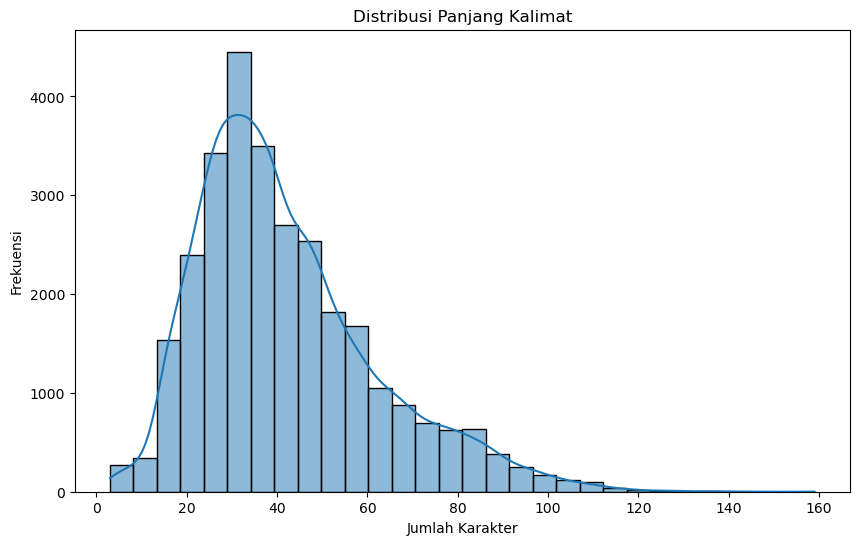

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], bins=30, kde=True)
plt.title('Distribusi Panjang Kalimat')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

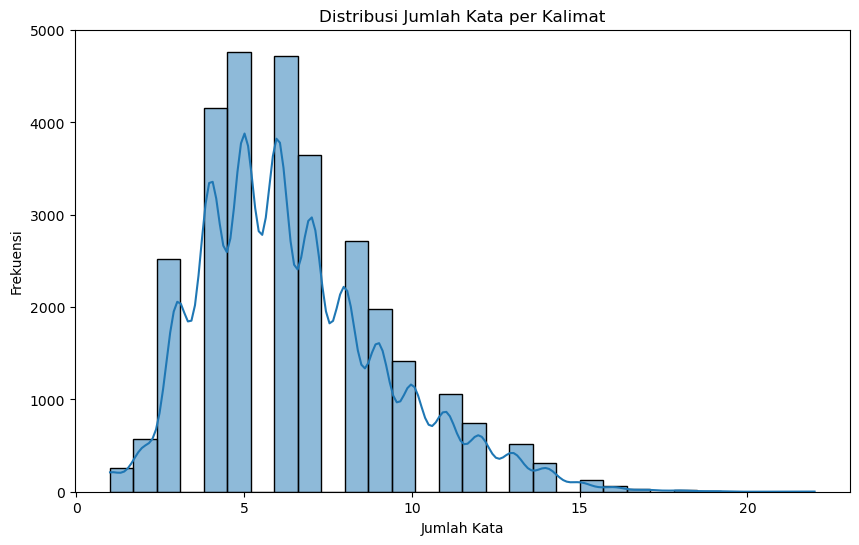

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Kata per Kalimat')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

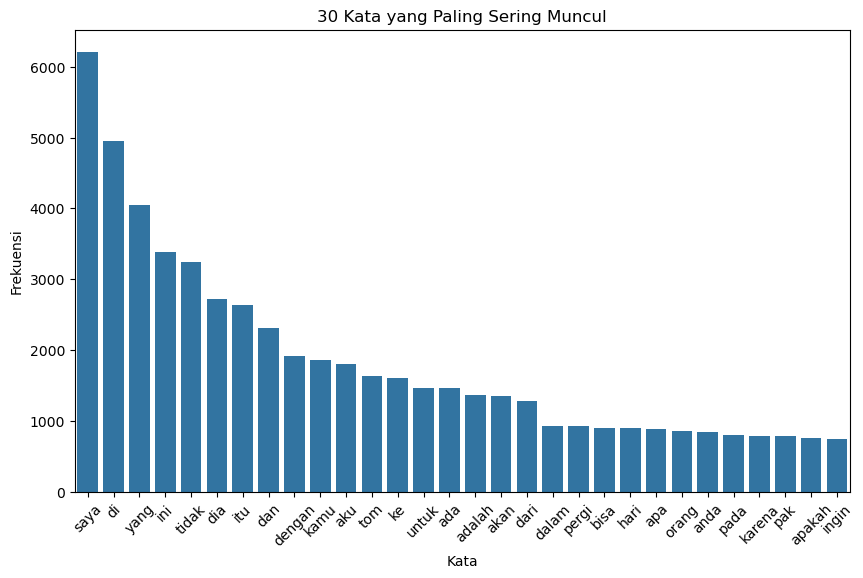

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('30 Kata yang Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

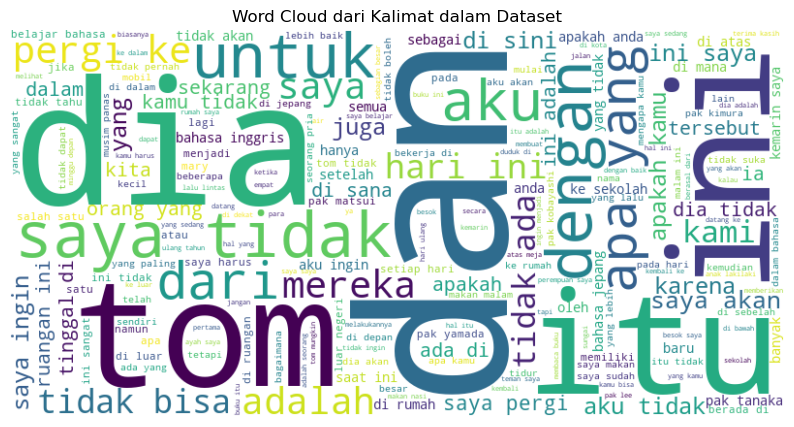

In [36]:
from wordcloud import WordCloud

# Membuat teks gabungan dari semua kalimat dalam dataset
text = ' '.join(df['sentence'])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kalimat dalam Dataset')
plt.show()


In [ ]:
df.drop(columns=[col for col in df.columns if col not in ['sentence', 'path']], inplace=True)

In [ ]:
data = pd.DataFrame(df)

data.to_csv('Dataset/data.csv', index=False)